# Project Title
## Hypothesis

In [33]:
# Initial imports
import os
import yfinance as yf
import ta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv


# Load .env environment variables
load_dotenv()

True

In [34]:
df = yf.download("NVDA", start = "2017-04-11")

[*********************100%***********************]  1 of 1 completed


In [35]:
df.Close = df["Adj Close"]

In [36]:
def applyindicatiors(df):
    df["SMA_200"] = df.Close.rolling(200).mean()
    df["SMA_20"] = df.Close.rolling(20).mean()
    df["STD"] = df.Close.rolling(20).std()
    df["Upper"] = df.SMA_20 + 2.5 * df.STD
    df["Lower"] = df.SMA_200 - 2.5 * df.STD
    df["RSI"] = ta.momentum.rsi(df.Close, 2)

In [37]:
applyindicatiors(df)

<AxesSubplot:xlabel='Date'>

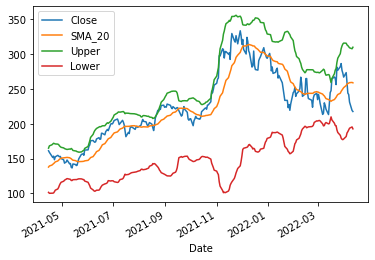

In [38]:
df.tail(252)[["Close", "SMA_20", "Upper", "Lower"]].plot()

In [39]:
def conditions(df):
    df["Buy"] = np.where((df.Close > df.SMA_200) &
                        (df.Close < df.Lower) &
                         (0.97 * df.Close >= df.Low.shift(-1)), 1, 0)
    df["Sell"] = np.where((df.RSI > 50), 1, 0)
    
    df["Buy_Price"] = 0.97 * df.Close
    df["Sell_Price"] = df.Open.shift(-1)

In [40]:
conditions(df)

In [3]:
df = yf.download('NVDA', start = "2017-04-11")

[*********************100%***********************]  1 of 1 completed


In [4]:
df["SMA"] = df.Close.rolling(window=20).mean()

In [5]:
df["STD"] = df.Close.rolling(window=20).std()

In [6]:
df["Upper"] = df.SMA + 2* df.STD
df["Lower"] = df.SMA - 2* df.STD

In [7]:
df["Buy_Signal"] = np.where(df.Lower > df.Close, True, False)
df["Sell_Signal"] = np.where(df.Upper < df.Close, True, False)

In [42]:
df = df.dropna()

In [43]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,STD,Upper,Lower,RSI,Buy,Sell,Buy_Price,Sell_Price
Date,,,,,,,,,,,,,,,,
2018-01-25,59.500000,59.937500,58.937500,58.536064,58.536064,40988400,42.297143,54.334270,3.373435,62.767858,33.863555,63.218950,0,1,56.779982,59.529999
2018-01-26,59.529999,60.834999,59.400002,60.264778,60.264778,51635600,42.477280,54.905885,3.360667,63.307552,34.075613,91.301120,0,1,58.456835,60.685001
2018-01-29,60.685001,62.027500,60.152500,61.136566,61.136566,45511600,42.662777,55.518241,3.322268,63.823910,34.357108,95.085544,0,1,59.302469,60.277500
2018-01-30,60.277500,61.605000,59.602501,60.113701,60.113701,57083200,42.845407,56.127749,2.953325,63.511062,35.462094,47.051594,0,0,58.310290,61.442501
2018-01-31,61.442501,62.317501,61.112499,60.876514,60.876514,47857600,43.027232,56.702955,2.675612,63.391986,36.338201,69.803577,0,1,59.050219,59.630001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,272.540009,273.190002,258.200012,259.309998,259.309998,43661500,242.989776,257.188999,22.473208,313.372020,186.806755,17.427100,0,0,251.530698,249.339996
2022-04-06,249.339996,253.000000,240.029999,244.070007,244.070007,70383300,243.266231,257.885500,21.796444,312.376609,188.775122,6.998276,0,0,236.747907,244.410004
2022-04-07,244.410004,247.220001,234.779999,242.080002,242.080002,55799200,243.524216,258.660500,20.881094,310.863233,191.321482,6.052394,0,0,234.817602,239.169998


In [50]:
plt.figure(figsize=(20,10))
plt.plot(df[["Close", "SMA_20", "Upper", "Lower"]])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker = '^', color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker = 'v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha=0.3)
plt.legend(["Close", "SMA", "Upper", "Lower"])
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1849166795.py, line 4)

In [11]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
    if df.Lower[i] > df.Close[i]:
        if open_pos == False:
            buys.append(i)
            open_pos = True
    elif df.Upper[i] < df.Close[i]:
        if open_pos:
            sells.append(i)
            open_pos = False

In [12]:
buys

[38,
 66,
 142,
 222,
 284,
 346,
 359,
 494,
 563,
 715,
 875,
 961,
 1009,
 1099,
 1158,
 1240]

In [13]:
sells

[62, 90, 165, 250, 315, 352, 463, 537, 585, 755, 932, 981, 1021, 1125, 1224]

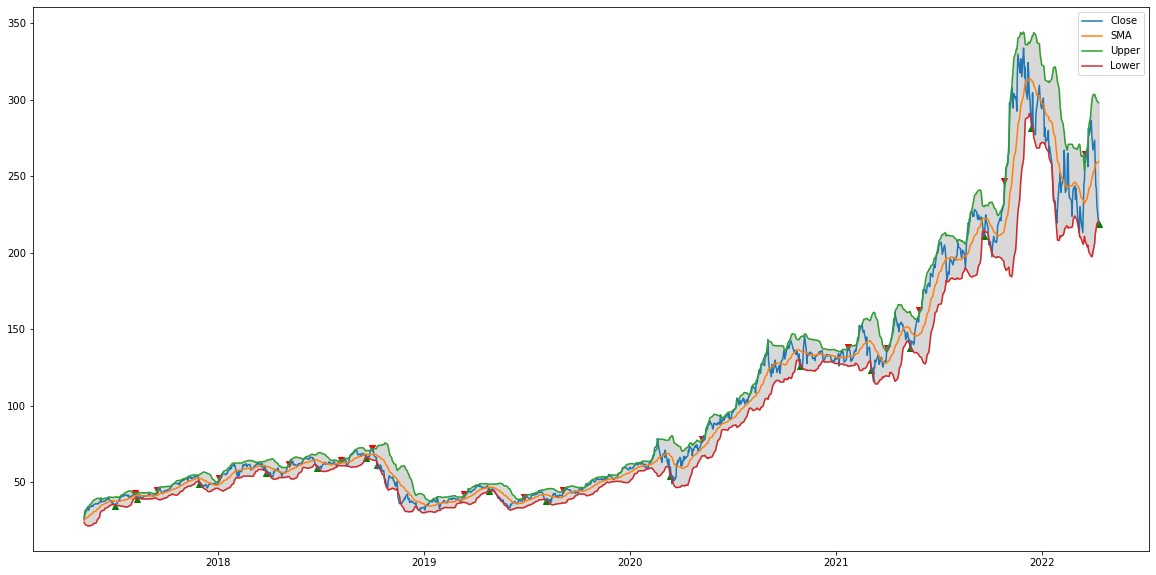

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df[["Close", "SMA", "Upper", "Lower"]])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker = '^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker = 'v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha=0.3)
plt.legend(["Close", "SMA", "Upper", "Lower"])
plt.show()

In [15]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis = 1)
merged.columns = ["Buys", "Sells"]
merged

,Buys,Sells
Date,,
2017-07-03,34.832500,NaN
2017-08-07,NaN,43.087502
2017-08-11,38.990002,NaN
2017-09-15,NaN,45.027500
2017-11-29,49.105000,NaN
2018-01-03,NaN,53.117500
2018-03-27,56.380001,NaN
2018-05-07,NaN,62.169998
2018-06-25,59.779999,NaN


In [16]:
total_profit = merged.shift(-1).Sells - merged.Buys
total_profit

Date
2017-07-03     8.255001
2017-08-07          NaN
2017-08-11     6.037498
2017-09-15          NaN
2017-11-29     4.012501
2018-01-03          NaN
2018-03-27     5.789997
2018-05-07          NaN
2018-06-25     4.825005
2018-08-08          NaN
2018-09-21     6.477493
2018-10-01          NaN
2018-10-10   -19.267502
2019-03-13          NaN
2019-04-26    -3.715000
2019-06-27          NaN
2019-08-05     7.237503
2019-09-05          NaN
2020-03-12    24.047501
2020-05-08          NaN
2020-10-28    12.405006
2021-01-21          NaN
2021-03-04    14.414993
2021-04-01          NaN
2021-05-12    24.860001
2021-05-28          NaN
2021-09-20    36.039993
2021-10-26          NaN
2021-12-13   -17.079987
2022-03-18          NaN
2022-04-11          NaN
dtype: float64

In [17]:
rel_profits = (merged.shift(-1).Sells - merged.Buys)/merged.Buys
rel_profits.mean()

0.10002423943770987

In [18]:
def strategy(df, Short_SMA, Long_SMA):
    df = df.copy()
    df["Returns"] = np.log(df.Close.pct_change() + 1)
    df["Short_SMA"] = df.Close.rolling(Short_SMA).mean()
    df["Long_SMA"] = df.Close.rolling(Long_SMA).mean()
    df = df.dropna()
    df["Position"] = np.where(df["Short_SMA"] > df["Long_SMA"], 1, 0)
    df["Strategy Returns"] = df["Position"].shift(1) * df["Returns"]
    df = df.dropna()
    return df

In [19]:
def performance(df):
    return np.exp(df[["Returns", "Strategy Returns"]].sum())

In [20]:
performance(strategy(df, 20, 50))

Returns             5.309994
Strategy Returns    2.577948
dtype: float64

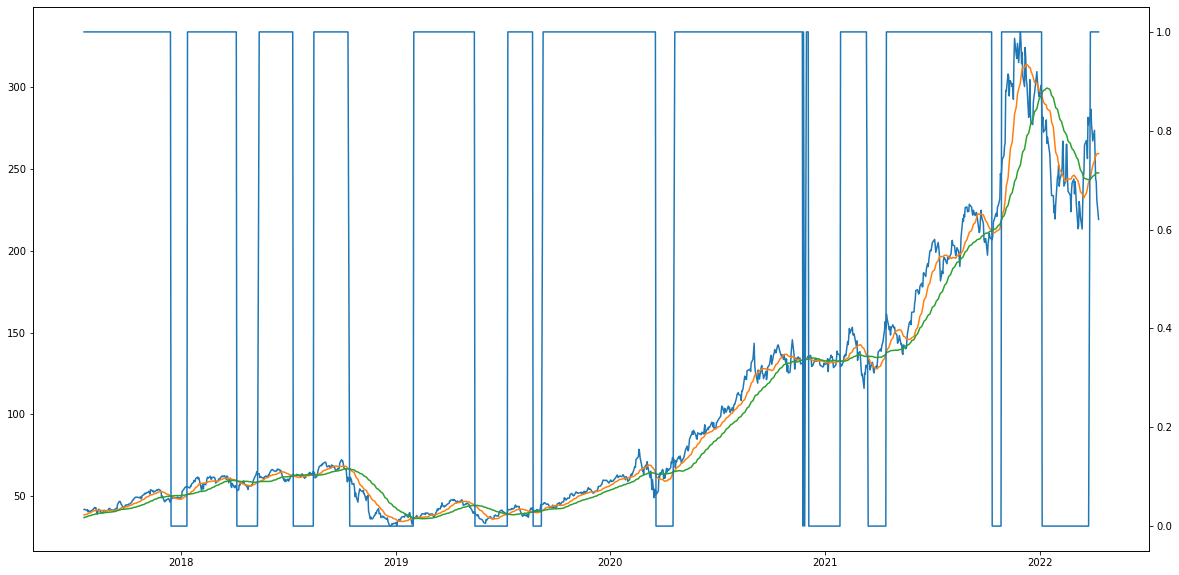

In [21]:
stratdf = strategy(df,20,50)

fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.plot(stratdf[["Close", "Short_SMA", "Long_SMA"]])
ax2.plot(stratdf[["Position"]])

In [22]:
SMA_Short_list = range(10, 60, 5)
SMA_Long_list = range(61, 201, 5)

In [28]:
def SMA_Tester(SMA_Short_list, SMA_Long_list):
    profits = []
    short, long = [], []



    for i,e in zip(SMA_Short_list, SMA_Long_list):
        profit = performance(strategy(df, i, e))
        profits.append(profit)
        short.append(i)
        long.append(e)

    columns = {"level_0": "SMA_Short", "level_1": "SMA_Long"}
    frame = pd.DataFrame(profits, [short, long]).reset_index().rename(columns=columns)
    frame["Trading Edge"] = frame["Strategy Returns"] - frame["Returns"]
    return frame.sort_values("Trading Edge", ascending=False)

In [29]:
SMA_Tester(SMA_Short_list, SMA_Long_list)

,SMA_Short,SMA_Long,Returns,Strategy Returns,Trading Edge
9,55,106,4.835521,5.272438,0.436917
6,40,91,4.867470,5.071052,0.203582
8,50,101,4.903955,5.100690,0.196735
7,45,96,4.897654,4.824653,-0.073000
5,35,86,5.355733,4.062083,-1.293650
3,25,76,5.307101,3.505906,-1.801194
4,30,81,5.173985,3.216888,-1.957097
2,20,71,5.429368,3.025481,-2.403887
1,15,66,5.321597,2.836026,-2.485571
0,10,61,5.265978,2.662756,-2.603222


In [30]:
pd.DataFrame(profits, [short, long])

NameError: name 'profits' is not defined

In [53]:
strategy(df, 20, 50)

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower,Buy_Signal,Sell_Signal,Returns,Short_SMA,Long_SMA,Position,Strategy Returns
Date,,,,,,,,,,,,,,,,,
2019-07-22,42.325001,42.959999,42.250000,42.830002,42.641148,31594000,40.808875,1.415694,43.640263,37.977487,False,False,0.016954,40.808875,38.712750,1,0.016954
2019-07-23,43.224998,43.935001,43.067501,43.915001,43.721363,42817600,41.096375,1.434251,43.964876,38.227873,False,False,0.025017,41.096375,38.746950,1,0.025017
2019-07-24,44.349998,44.722500,43.584999,44.665001,44.468060,36623600,41.436125,1.434562,44.305250,38.567000,False,True,0.016934,41.436125,38.848000,1,0.016934
2019-07-25,44.247501,44.375000,43.110001,43.345001,43.153873,39270000,41.612625,1.441748,44.496122,38.729128,False,False,-0.029999,41.612625,38.904700,1,-0.029999
2019-07-26,43.617500,44.237499,43.617500,43.767502,43.574512,27416000,41.760625,1.505277,44.771179,38.750071,False,False,0.009700,41.760625,38.982150,1,0.009700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,272.540009,273.190002,258.200012,259.309998,259.309998,43661500,257.188999,22.473208,302.135416,212.242582,False,False,-0.053643,257.188999,246.781400,1,-0.053643
2022-04-06,249.339996,253.000000,240.029999,244.070007,244.070007,70383300,257.885500,21.796444,301.478387,214.292612,False,False,-0.060569,257.885500,247.198000,1,-0.060569
2022-04-07,244.410004,247.220001,234.779999,242.080002,242.080002,55799200,258.660500,20.881094,300.422687,216.898313,False,False,-0.008187,258.660500,247.485200,1,-0.008187


In [36]:
import alpaca_trade_api as tradeapi

APCA_API_KEY_ID = os.getenv("ALPACA_API_KEY")
APCA_API_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
APCA_API_BASE_URL = "https://paper-api.alpaca.markets"

In [37]:
# Create a connection to the API 
api = tradeapi.REST(APCA_API_KEY_ID, APCA_API_SECRET_KEY, APCA_API_BASE_URL, api_version="v2")

In [38]:
 # Set signal variable
signal = 1

In [39]:
# Create buy signal, num shares and ticker
if signal == 1:
    orderSide = "buy"
else:
    orderSide = "sell"

In [40]:
 # Set the ticket symbol and the number of shares to buy
ticker = "NVDA"
number_of_shares = 1

In [43]:
 # Get final closing price
prices = api.get_bars("AAPL", "1Min", limit=1, adjustment = "raw")
#limit_amount = prices["NVDA"]["Close"][-1]
prices

[]

In [61]:
prices = api.get_bars( "AAPL", "1Day", limit=1,adjustment="raw")
prices

[]